<a href="https://colab.research.google.com/github/nerbivol/Methods-and-systems-of-artificial-intelligence/blob/main/image_borders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

(720, 1280) (1280, 853) (1280, 1280)


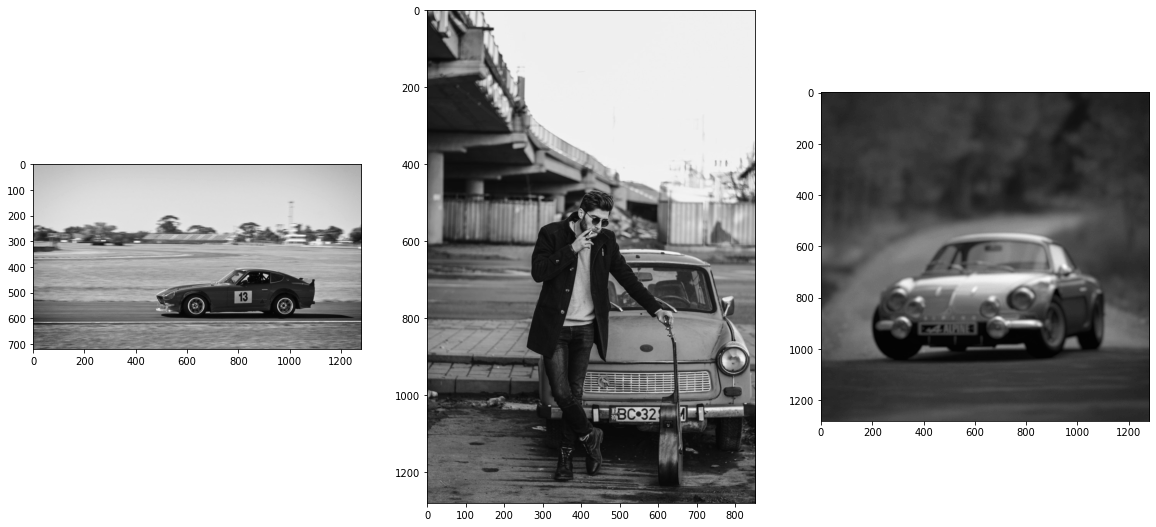

In [ ]:
img1 = cv2.imread('/content/drive/My Drive/Colab Data/41.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/drive/My Drive/Colab Data/42.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('/content/drive/My Drive/Colab Data/43.jpg', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 3, figsize=(20, 15))
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')
ax[2].imshow(img3, cmap='gray')
print(img1.shape, img2.shape, img3.shape)

In [ ]:
imgs = [img1, img2, img3]

### Визначимо межі за допомогою адаптивного порогу обробити зображення і знайдемо контури

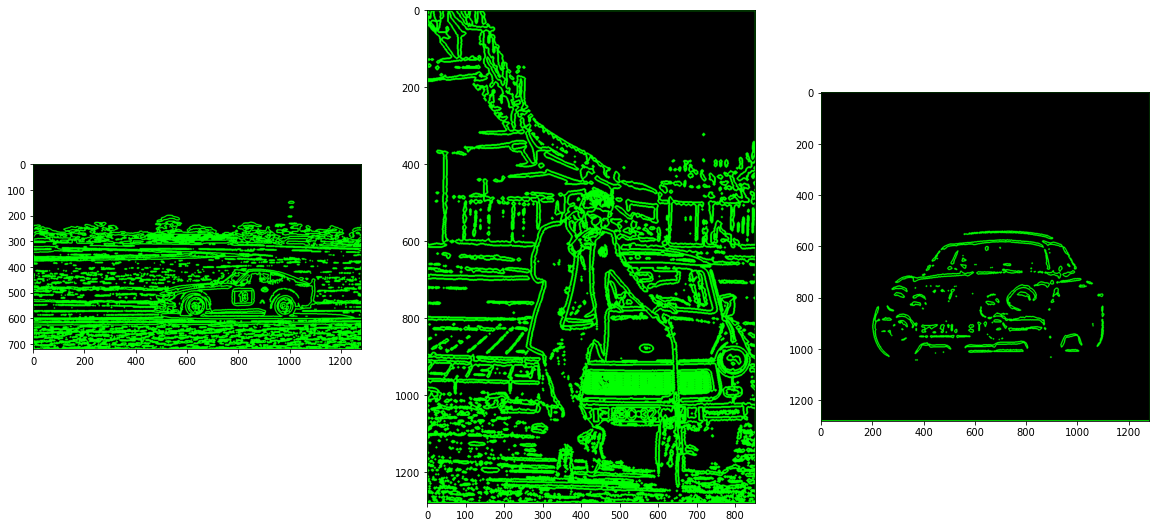

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

for i, img in enumerate(imgs):
  thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,12)
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
  drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), dtype=np.uint8)
  cv2.drawContours(drawing, contours, -1, (0,255,0), 3)
  
  ax[i].imshow(drawing)

Серед результатів бачимо, що на першому та другому зображення виділилося дуже багато обєктів, тому оцінка 6 для двох зображень, а на 3-му зображені лише декілька об'єктів автомобіля, тому 7.

### Метод Собеля

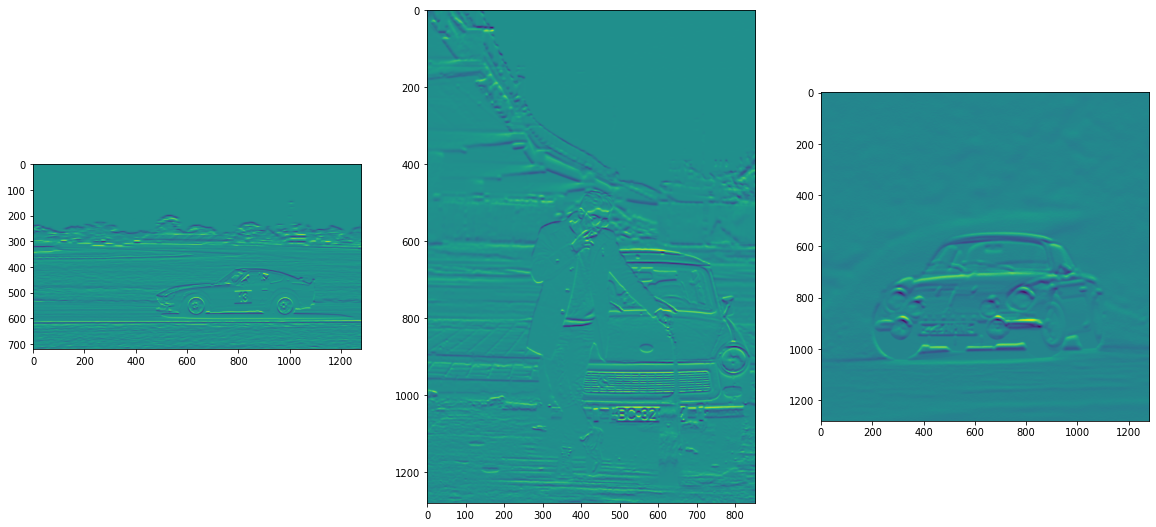

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

for i, img in enumerate(imgs):
  sobely = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=11)
  ax[i].imshow(sobely)


Метод Собеля доволі непогано справився із визначеннням меж для зображення, тому для всіх зображень оцінка 8.

### Метод Превітта

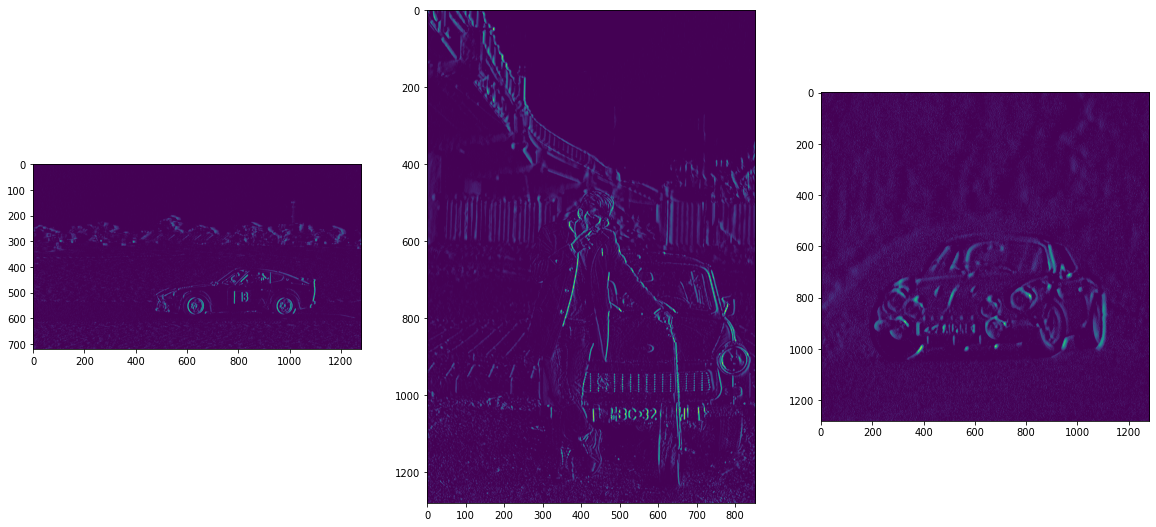

In [ ]:
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

fig, ax = plt.subplots(1, 3, figsize=(20, 15))

for i, img in enumerate(imgs):
  prewittx = cv2.filter2D(img, -1, kernely)
  ax[i].imshow(prewittx)

Метод Превітта: </br>
- 1 зображенння: 9 балів
- 2 зображення: 7 балів
- 3 зображення: 8 балів

### Метод Робертса

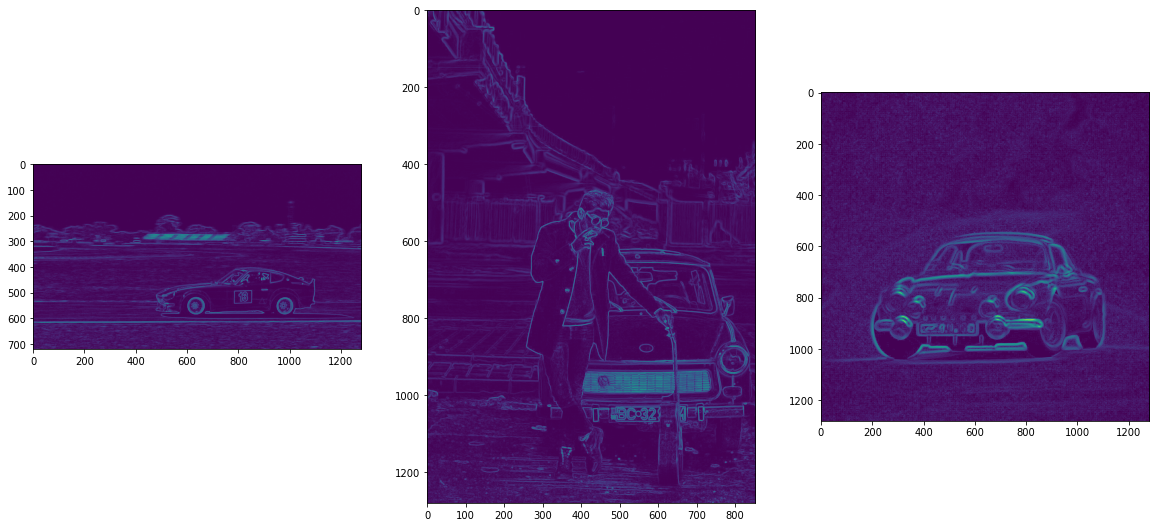

In [ ]:
from scipy import ndimage

roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )

fig, ax = plt.subplots(1, 3, figsize=(20, 15))

for i, img in enumerate(imgs):
  imgf = img.astype('float64') / 255.0
  vertical = ndimage.convolve(imgf, roberts_cross_v )
  horizontal = ndimage.convolve(imgf, roberts_cross_h )

  output_image = np.sqrt( np.square(horizontal) + np.square(vertical))
  ax[i].imshow(output_image)

Метод Робертса: </br>
- 1 зображенння: 10 балів
- 2 зображення: 10 балів
- 3 зображення: 10 балів

### За допомогою оператора Лапласіана

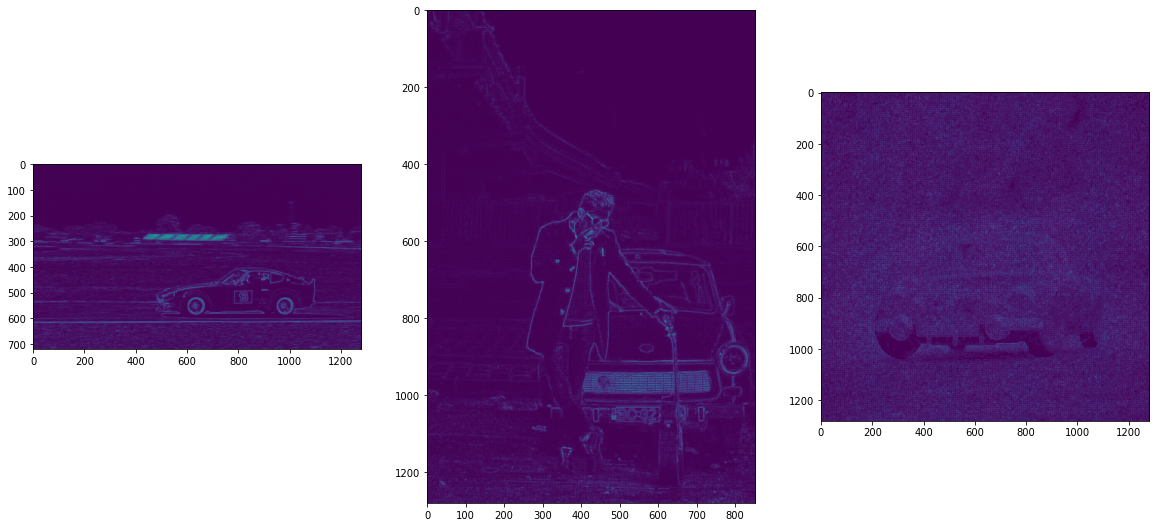

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

for i, img in enumerate(imgs):
  laplacian = cv2.Laplacian(img,13,cv2.CV_64F)
  filtered_image = cv2.convertScaleAbs(laplacian)
  ax[i].imshow(filtered_image)

Метод Робертса: </br>
- 1 зображенння: 10 балів
- 2 зображення: 10 балів
- 3 зображення: 2 балів

Для Роберса бачимо, що метод погано працює з розмитими зображеннями.

### Canny

In [ ]:
from skimage.filters import gaussian

def canny(img, sigma, threshold1, threshold2):
  fig, ax = plt.subplots(4, 8, figsize=(40, 15))

  for i, sig in enumerate(sigma):
    for  j, thresh1 in enumerate(threshold1):
      for k, thresh2 in enumerate(threshold2):
        if sig:
          img = gaussian(img, sigma=sig)
          img = (img * 255).astype("uint8")

        edges = cv2.Canny(img,thresh1,thresh2)
        ax[i][j*4+k].imshow(edges)
        ax[i][j*4+k].set(title=f"sigma:{sig}, thresh1:{thresh1}, thresh2:{thresh2}")
        ax[i][j*4+k].axis('off')
  

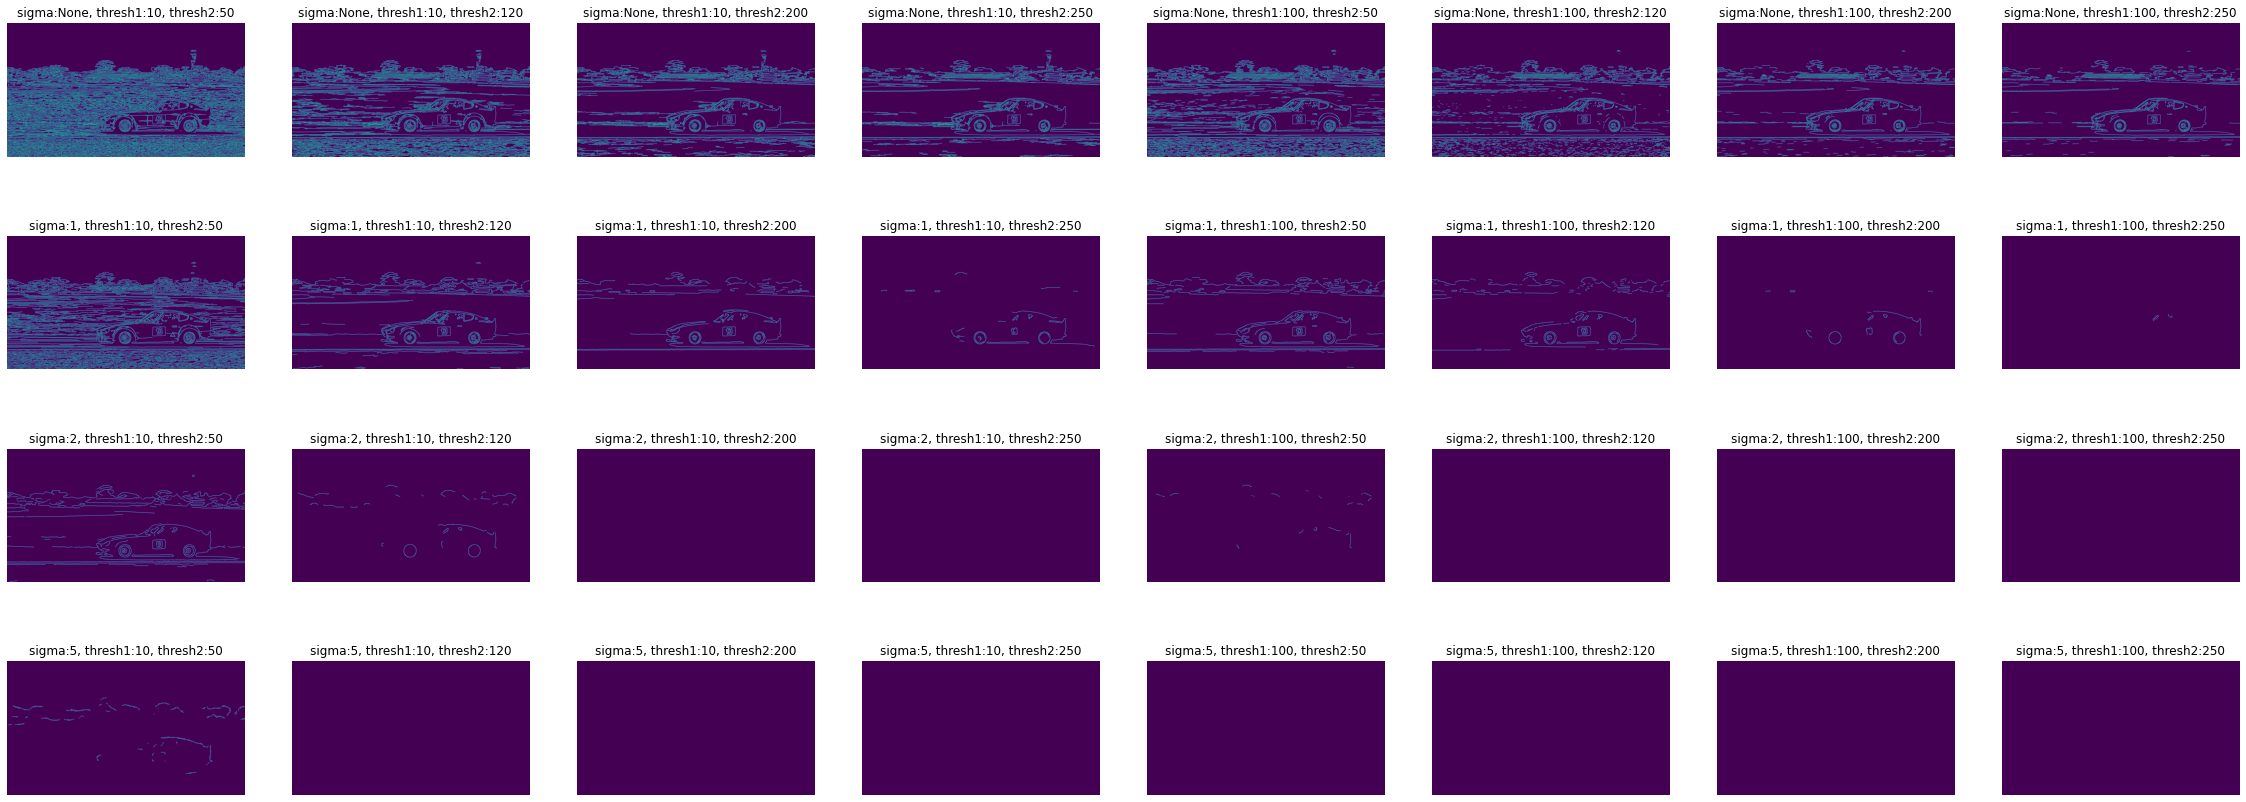

In [ ]:
threshold1 = [10, 100]
threshold2 = [50, 120, 200, 250]
sigma = [None, 1, 2, 5]

canny(img1, sigma, threshold1, threshold2)

З отриманих результатів бачимо, що sigma дуже впливає на кількість об'єктів і чим більші значення sigma і параметрів гістерезису, тим складніше найти межі. Найкращі результати це при параметрах  sigma:2, thresh1:10, thresh2:50 та при параметрах sigma:1, thresh1:10, thresh2:200 та sigma:1, thresh1:100, thresh2:50. І для цих значень оцінка 9.

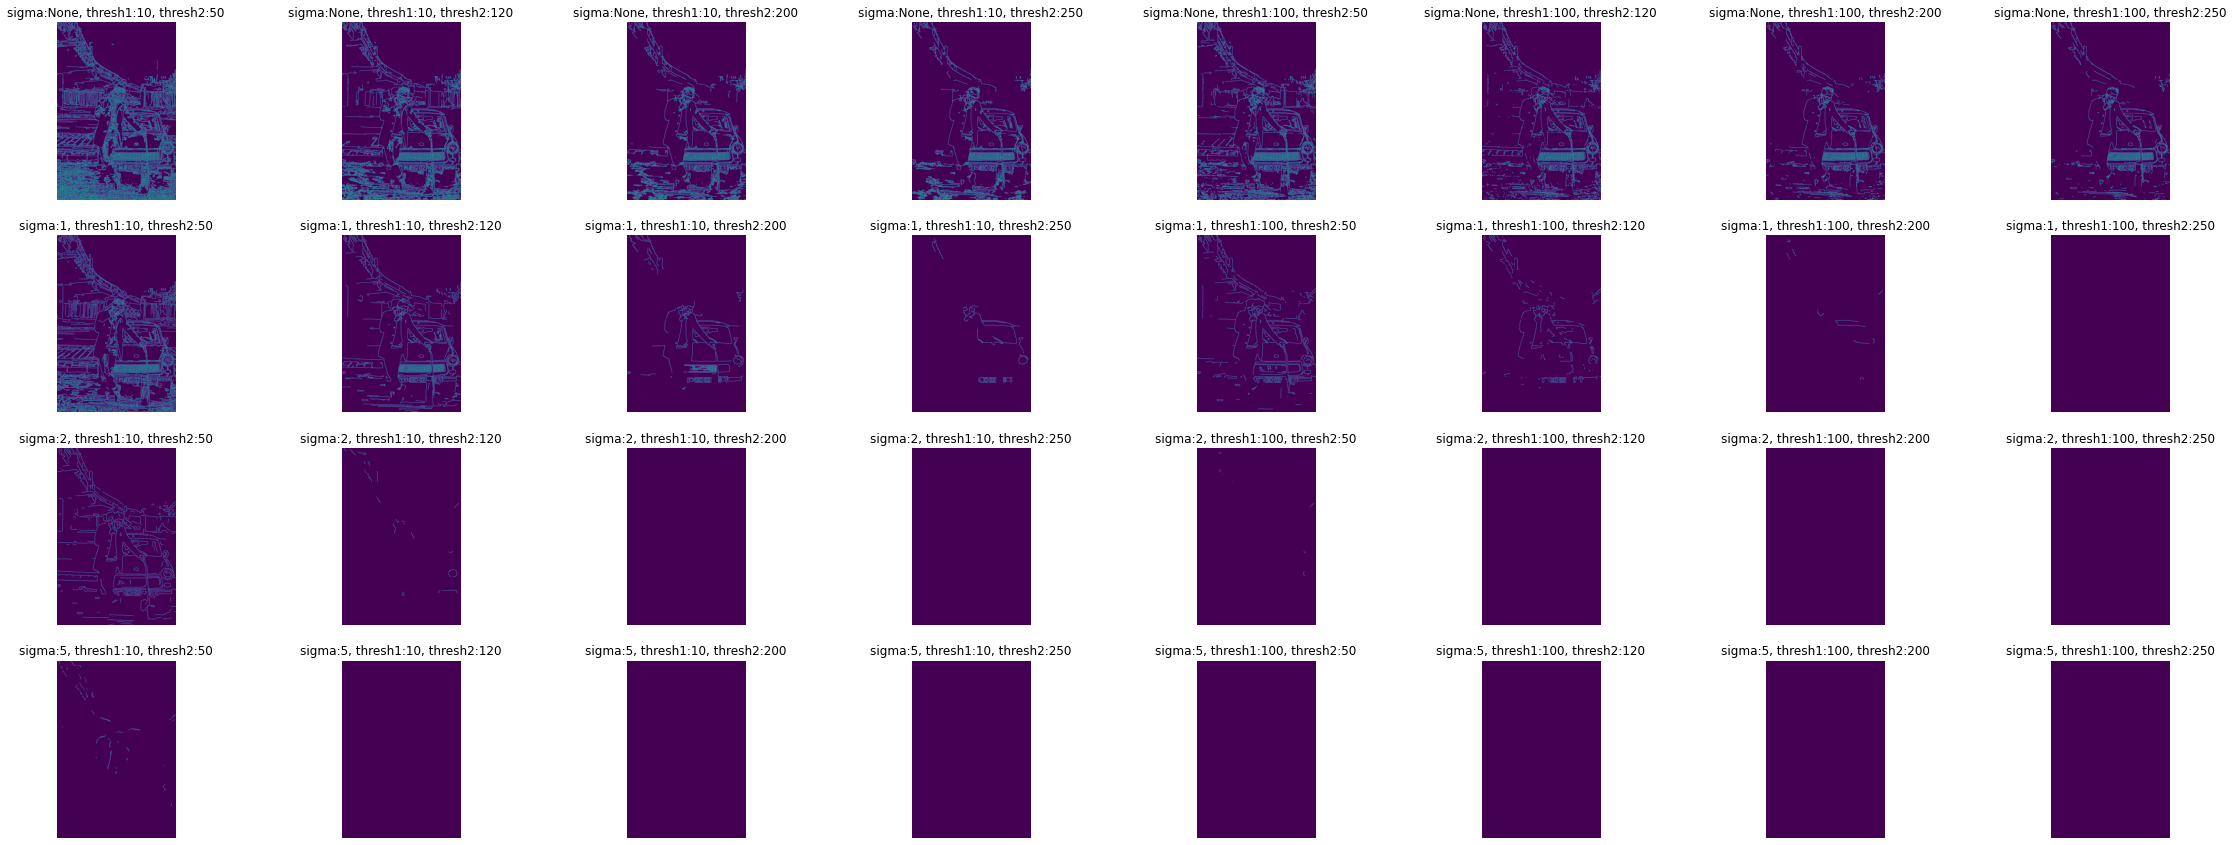

In [ ]:
canny(img2, sigma, threshold1, threshold2)

Найкращий результат при sigma:1, thresh1:10, thresh2:120. Ну іще при sigma:2, thresh1:10, thresh2:50,  Оцінка 10 

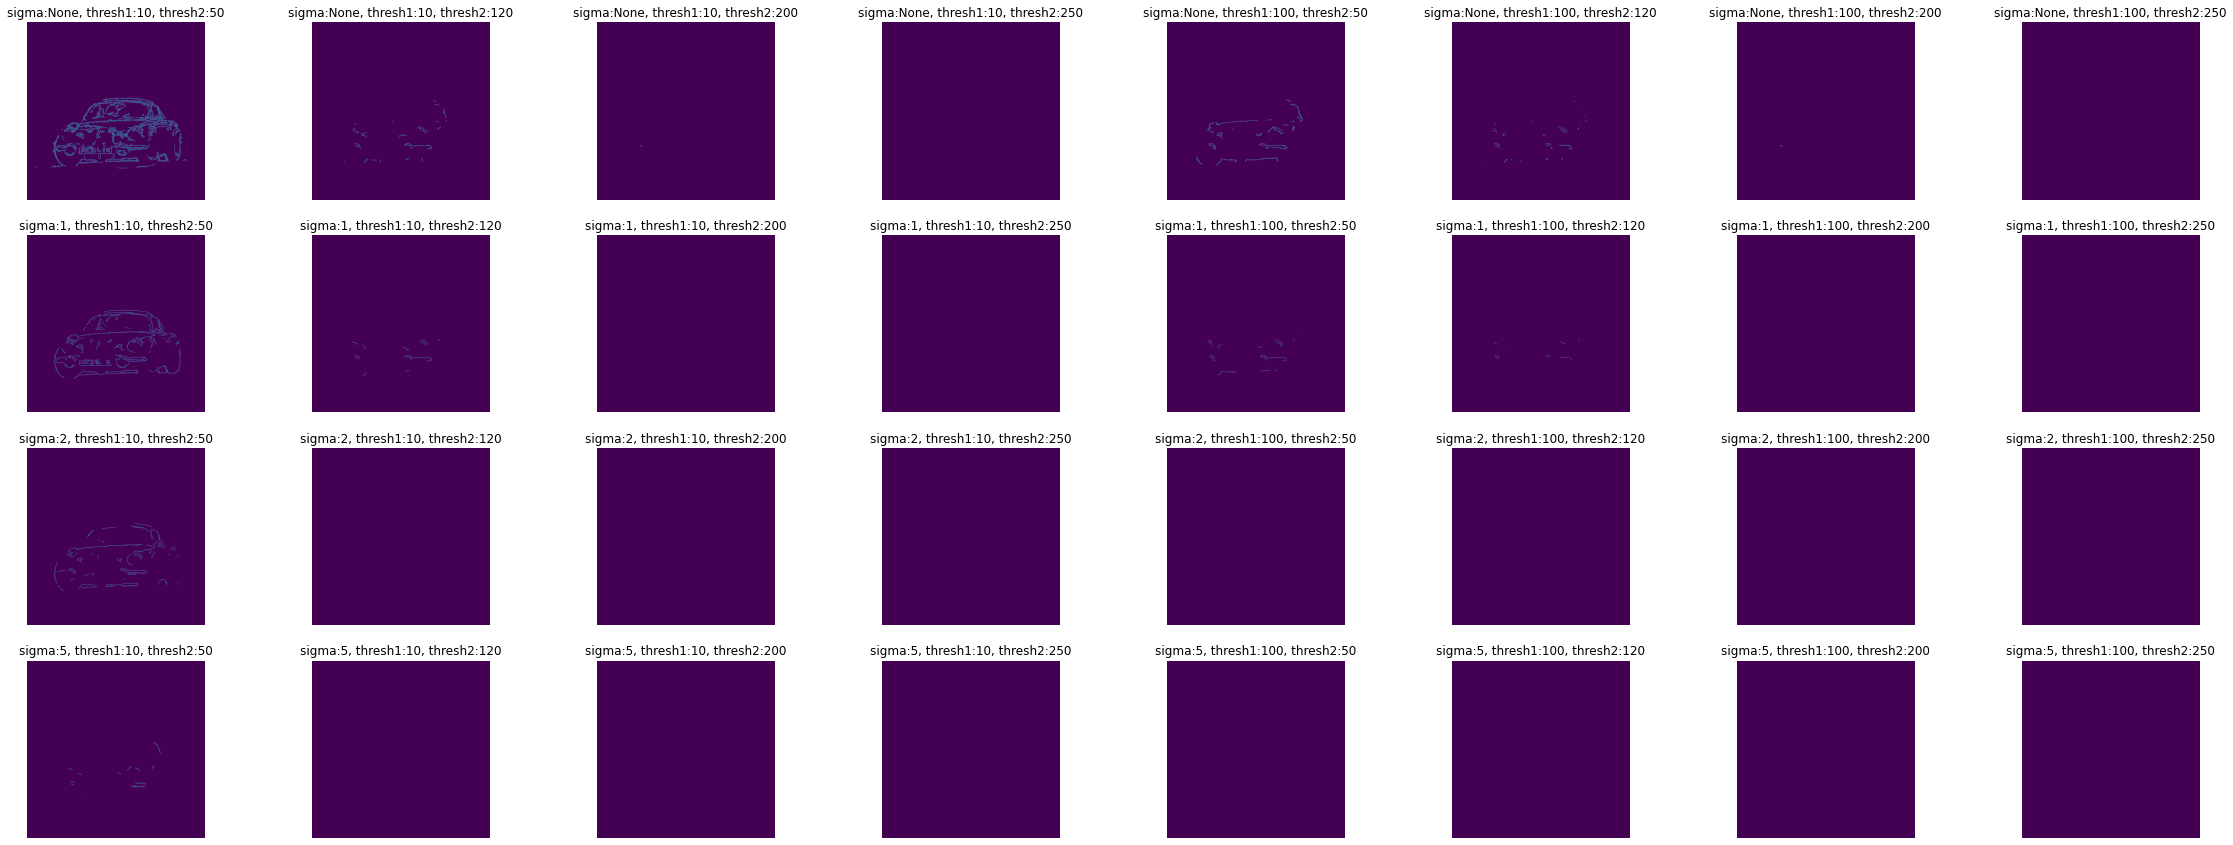

In [ ]:
canny(img3, sigma, threshold1, threshold2)

У даному випадку найкращим результатом є sigma:1, thresh1:10, thresh2:50. Оцінка 10. Для sigma:None, thresh1:10, thresh2:50 бачимо, що для даного зображення жоден із досліджуваних методів не дав подібного результату, але все таки є ввиділено багато непотрібних деталей.

 ### HED

In [ ]:
img1 = cv2.imread('/content/drive/My Drive/Colab Data/41.jpg')
img2 = cv2.imread('/content/drive/My Drive/Colab Data/42.jpg')
img3 = cv2.imread('/content/drive/My Drive/Colab Data/43.jpg')

imgs = [img1, img2, img3]

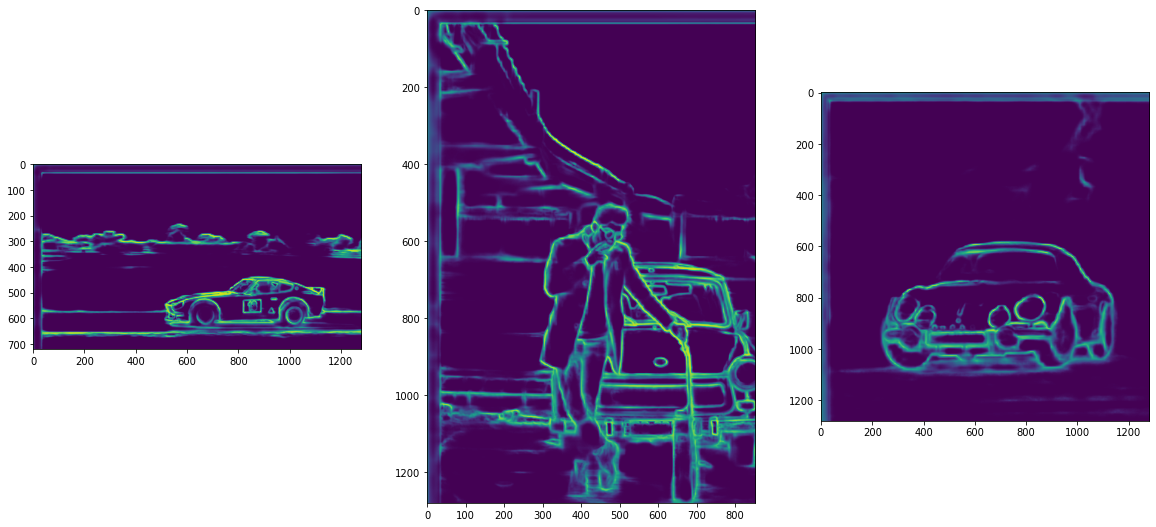

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

for i, img in enumerate(imgs):
  # The pre-trained model that OpenCV uses has been trained in Caffe framework
  prototxt = "/content/drive/My Drive/Colab Data/deploy.prototxt"
  caffemodel = "/content/drive/My Drive/Colab Data/hed_pretrained_bsds.caffemodel"
  net = cv2.dnn.readNetFromCaffe(prototxt, caffemodel)
  
  (H, W) = img.shape[:2]
  mean_pixel_values= np.average(img, axis = (0,1))
  blob = cv2.dnn.blobFromImage(img, scalefactor=0.7, size=(W, H), swapRB= False, crop=False)
  net.setInput(blob)
  hed = net.forward()
  hed = hed[0,0,:,:]  #Drop the other axes 
  hed = (255 * hed).astype("uint8")  #rescale to 0-255
  ax[i].imshow(hed)


Даний метод доволі добре виділяє межі, проте вони є нечітко виділеними. Тому оцінка 9 для всіх зображень.

Отже, під час виконання домашнього завдання було проведено порівняльний аналіз методів виділення меж: детектор меж Кенні, детектор меж за допомогою оператора Лапласіана, детектор меж за допомогою оператора Собеля, детектор меж за допомогою оператора Превітта, детектор меж за допомогою оператора Робертса та HED. З отриманих результатів можна сказати, що найкращий результат дав метод Робертса.